In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv("Dataset.csv")
df = df.drop("Date and Time",axis=1)

In [166]:
df

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Activity
0,26.5,65.13,5.93,33.0,527.0,0.0,1013.93,8.98,31.44,NaN
1,26.4,65.35,12.39,34.0,523.0,0.0,1013.92,8.72,28.00,NaN
2,26.4,65.59,8.84,35.0,525.0,0.0,1013.89,8.67,27.14,NaN
3,26.4,65.54,12.67,36.0,501.0,0.0,1013.92,8.79,29.20,NaN
4,26.4,65.49,29.85,36.0,513.0,0.0,1013.95,8.90,30.97,NaN
...,...,...,...,...,...,...,...,...,...,...
350547,24.9,55.90,20.44,523.0,2337.0,0.0,1018.57,4.43,0.87,NaN
350548,24.9,55.87,18.90,523.0,2319.0,0.0,1018.53,4.43,0.45,NaN
350549,24.9,55.92,32.02,523.0,2343.0,0.0,1018.46,4.45,0.45,NaN
350550,24.9,56.68,22.07,515.0,2353.0,0.0,1018.45,4.44,0.95,NaN


In [167]:
df.describe()

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
count,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000
mean,24.183997,61.291916,12.663875,138.774153,807.328936,0.001837,1004.920494,7.780949,11.721351
std,2.667947,8.840371,16.077963,159.673172,386.115438,0.268521,32.929983,2.825931,18.190809
min,17.000000,26.660000,3.020000,0.000000,400.000000,0.000000,870.460000,1.910000,0.000000
25%,22.500000,55.400000,5.050000,42.000000,489.000000,0.000000,1006.700000,5.320000,0.510000
50%,24.200000,61.430000,8.000000,91.000000,673.000000,0.000000,1013.490000,8.060000,1.970000
75%,25.700000,68.530000,13.600000,179.000000,1043.000000,0.000000,1018.290000,9.810000,17.570000
max,33.100000,96.280000,207.890000,1156.000000,7747.000000,129.560000,1032.190000,33.520000,235.640000


In [168]:
print("Shape:", df.shape)
df.info()

Shape: (350552, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350552 entries, 0 to 350551
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        350552 non-null  float64
 1   Relative Humidity  350552 non-null  float64
 2   PM2.5              350552 non-null  float64
 3   TVOC               350552 non-null  float64
 4   CO2                350552 non-null  float64
 5   CO                 350552 non-null  float64
 6   Air Pressure       350552 non-null  float64
 7   Ozone              350552 non-null  float64
 8   NO2                350552 non-null  float64
 9   Activity           16324 non-null   object 
dtypes: float64(9), object(1)
memory usage: 26.7+ MB


In [169]:
df.isnull().sum()

Temperature               0
Relative Humidity         0
PM2.5                     0
TVOC                      0
CO2                       0
CO                        0
Air Pressure              0
Ozone                     0
NO2                       0
Activity             334228
dtype: int64

In [170]:
df.value_counts()

Temperature  Relative Humidity  PM2.5  TVOC   CO2     CO   Air Pressure  Ozone  NO2    Activity
17.2         54.63              11.59  99.0   668.0   0.0  1027.22       7.87   8.04   Cooking     1
25.3         57.37              10.45  254.0  1422.0  0.0  1019.30       5.56   0.33   Cooking     1
             55.51              62.10  63.0   563.0   0.0  1016.18       5.22   0.74   Cooking     1
             55.66              3.79   136.0  1389.0  0.0  1016.50       5.60   0.82   Cooking     1
             55.78              57.89  72.0   572.0   0.0  1016.19       5.29   0.45   Cooking     1
                                                                                                  ..
23.5         70.91              3.80   30.0   769.0   0.0  997.73        9.88   5.60   Cooking     1
             71.32              5.71   32.0   744.0   0.0  997.79        9.87   5.46   Cooking     1
                                16.03  362.0  1287.0  0.0  1016.54       4.13   0.94   Cooking  

In [171]:
# Step 1: Replace None with 0
df["Activity"] = df["Activity"].fillna("0")

# Step 2: Convert Activity to binary
# 1 = Cooking, everything else = Not Cooking
df["Activity"] = df["Activity"].apply(lambda x: 1 if x == "Cooking" else 0)

# Step 3: Ensure integer type
df["Activity"] = df["Activity"].astype(int)

# Check final distribution
df["Activity"].value_counts()

Activity
0    334228
1     16324
Name: count, dtype: int64

In [172]:
df.head()

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Activity
0,26.5,65.13,5.93,33.0,527.0,0.0,1013.93,8.98,31.44,0
1,26.4,65.35,12.39,34.0,523.0,0.0,1013.92,8.72,28.00,0
2,26.4,65.59,8.84,35.0,525.0,0.0,1013.89,8.67,27.14,0
3,26.4,65.54,12.67,36.0,501.0,0.0,1013.92,8.79,29.20,0
4,26.4,65.49,29.85,36.0,513.0,0.0,1013.95,8.90,30.97,0


In [173]:
df["Activity"].unique()

array([0, 1])

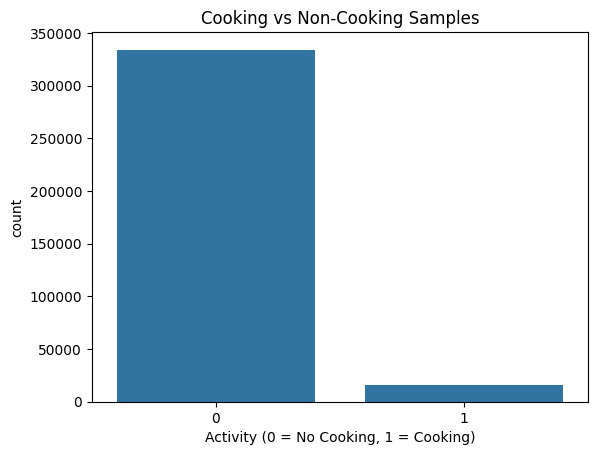

In [174]:
sns.countplot(x=df["Activity"])
plt.title("Cooking vs Non-Cooking Samples")
plt.xlabel("Activity (0 = No Cooking, 1 = Cooking)")
plt.show()

In [175]:
df.describe()

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Activity
count,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000
mean,24.183997,61.291916,12.663875,138.774153,807.328936,0.001837,1004.920494,7.780949,11.721351,0.046567
std,2.667947,8.840371,16.077963,159.673172,386.115438,0.268521,32.929983,2.825931,18.190809,0.210709
min,17.000000,26.660000,3.020000,0.000000,400.000000,0.000000,870.460000,1.910000,0.000000,0.000000
25%,22.500000,55.400000,5.050000,42.000000,489.000000,0.000000,1006.700000,5.320000,0.510000,0.000000
50%,24.200000,61.430000,8.000000,91.000000,673.000000,0.000000,1013.490000,8.060000,1.970000,0.000000
75%,25.700000,68.530000,13.600000,179.000000,1043.000000,0.000000,1018.290000,9.810000,17.570000,0.000000
max,33.100000,96.280000,207.890000,1156.000000,7747.000000,129.560000,1032.190000,33.520000,235.640000,1.000000


In [176]:
sensor_cols = df.drop("Activity",axis=1)
sensor_cols.mean()

Temperature            24.183997
Relative Humidity      61.291916
PM2.5                  12.663875
TVOC                  138.774153
CO2                   807.328936
CO                      0.001837
Air Pressure         1004.920494
Ozone                   7.780949
NO2                    11.721351
dtype: float64

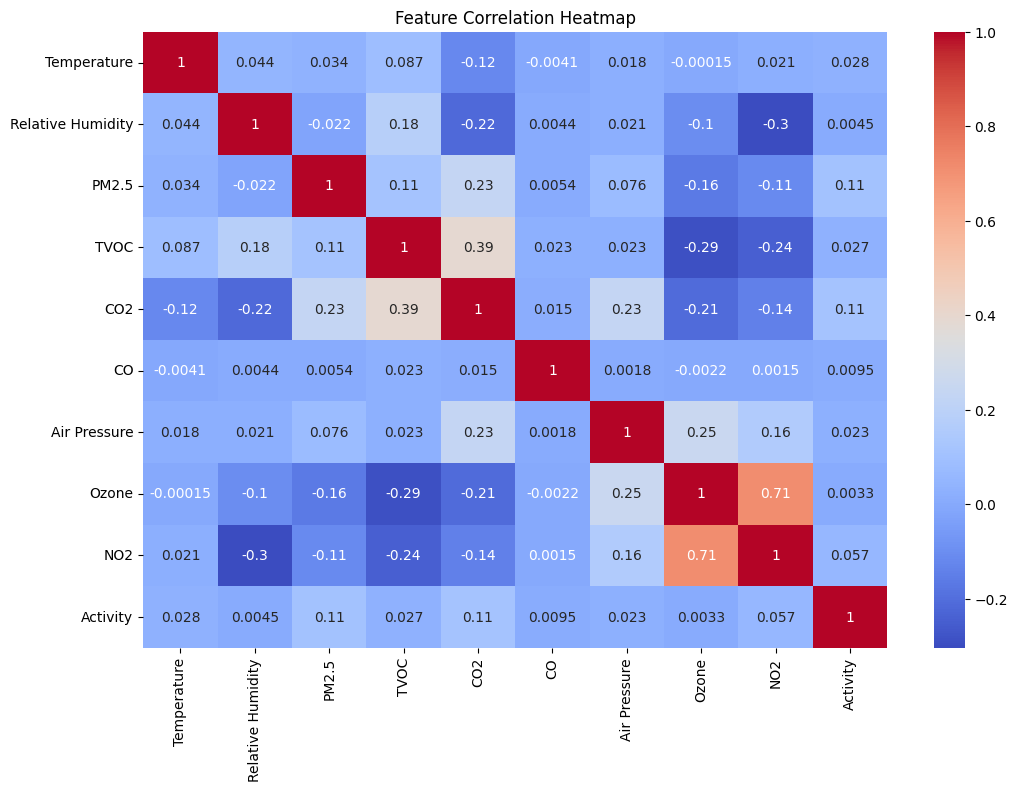

In [177]:
#in cooking higher temperature, TVOC, CO₂,PM2.5
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows that temperature, TVOC, CO₂, and CO are positively correlated with each other and with cooking activity. This confirms that cooking events influence multiple sensors simultaneously and validates the choice of these features for model training.

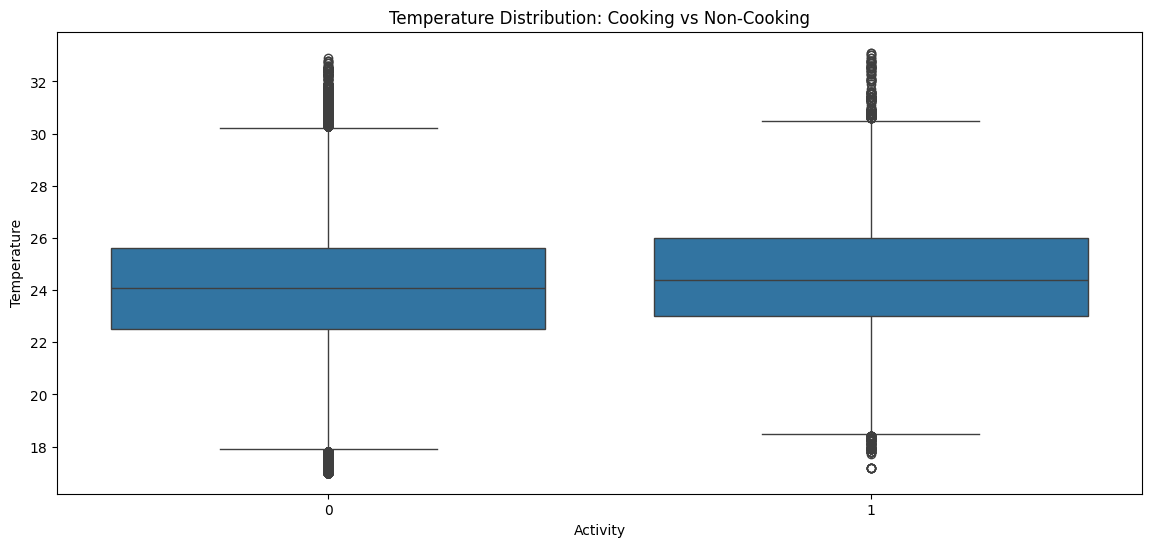

In [178]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Activity", y="Temperature")
plt.title("Temperature Distribution: Cooking vs Non-Cooking")
plt.show()

Temperature increases during cooking, but by itself it is not a strong standalone indicator due to overlap with normal conditions.

-The dots outside the whiskers represent outliers, which are temperature values significantly higher or lower than the typical range.

The outliers reflect real temperature spikes during cooking and are preserved, as they carry important signal rather than noise.

#### Solution :
Temperature contributes to cooking detection but must be combined with air-quality sensors for reliable classification.

tree-based models (Random Forest) which are robust to outliers

Combine temperature with gas and air-quality sensors for stability

### BASELINE MODEL: LOGISTIC REGRESSION (NO SMOTE)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350552 entries, 0 to 350551
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        350552 non-null  float64
 1   Relative Humidity  350552 non-null  float64
 2   PM2.5              350552 non-null  float64
 3   TVOC               350552 non-null  float64
 4   CO2                350552 non-null  float64
 5   CO                 350552 non-null  float64
 6   Air Pressure       350552 non-null  float64
 7   Ozone              350552 non-null  float64
 8   NO2                350552 non-null  float64
 9   Activity           350552 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 25.4 MB


In [180]:
# df = df.drop(columns=["Date and Time"])

In [181]:
df

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Activity
0,26.5,65.13,5.93,33.0,527.0,0.0,1013.93,8.98,31.44,0
1,26.4,65.35,12.39,34.0,523.0,0.0,1013.92,8.72,28.00,0
2,26.4,65.59,8.84,35.0,525.0,0.0,1013.89,8.67,27.14,0
3,26.4,65.54,12.67,36.0,501.0,0.0,1013.92,8.79,29.20,0
4,26.4,65.49,29.85,36.0,513.0,0.0,1013.95,8.90,30.97,0
...,...,...,...,...,...,...,...,...,...,...
350547,24.9,55.90,20.44,523.0,2337.0,0.0,1018.57,4.43,0.87,0
350548,24.9,55.87,18.90,523.0,2319.0,0.0,1018.53,4.43,0.45,0
350549,24.9,55.92,32.02,523.0,2343.0,0.0,1018.46,4.45,0.45,0
350550,24.9,56.68,22.07,515.0,2353.0,0.0,1018.45,4.44,0.95,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350552 entries, 0 to 350551
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        350552 non-null  float64
 1   Relative Humidity  350552 non-null  float64
 2   PM2.5              350552 non-null  float64
 3   TVOC               350552 non-null  float64
 4   CO2                350552 non-null  float64
 5   CO                 350552 non-null  float64
 6   Air Pressure       350552 non-null  float64
 7   Ozone              350552 non-null  float64
 8   NO2                350552 non-null  float64
 9   Activity           350552 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 25.4 MB


In [183]:
from sklearn.model_selection import train_test_split

X = df.drop("Activity", axis=1)
y = df["Activity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [184]:
X_train

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
312375,23.2,51.83,4.21,63.0,1190.0,0.0,1029.05,7.57,7.91
113270,24.5,70.31,11.33,109.0,426.0,0.0,992.72,10.85,17.46
238758,19.9,61.85,4.77,15.0,539.0,0.0,1015.86,9.27,41.24
237785,20.7,61.37,4.73,12.0,776.0,0.0,1011.39,5.25,0.32
71258,22.1,71.13,9.00,74.0,667.0,0.0,1015.41,4.96,0.94
...,...,...,...,...,...,...,...,...,...
330962,24.6,42.84,14.52,190.0,1191.0,0.0,1026.53,6.58,0.54
64729,21.6,69.03,20.44,431.0,690.0,0.0,1000.28,4.64,0.21
276036,20.9,48.30,4.36,58.0,879.0,0.0,1020.92,13.33,14.10
197151,21.7,63.29,16.52,1.0,656.0,0.0,1010.50,11.35,24.95


In [185]:
X_test

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
94378,24.3,57.23,16.59,0.0,479.0,0.0,1016.82,6.36,0.99
306664,24.9,57.38,6.35,249.0,1877.0,0.0,1006.44,5.71,0.93
153417,27.5,51.92,11.13,59.0,577.0,0.0,1014.27,6.16,0.71
209238,23.8,61.18,7.18,423.0,400.0,0.0,883.19,3.49,0.05
231772,21.0,66.47,3.67,1.0,1415.0,0.0,1000.82,9.21,7.87
...,...,...,...,...,...,...,...,...,...
188045,22.0,75.28,3.55,72.0,710.0,0.0,1003.15,9.30,0.06
52284,22.8,73.78,8.72,767.0,985.0,0.0,1018.78,4.34,0.01
104483,24.7,51.03,3.79,7.0,451.0,0.0,994.60,13.86,62.32
292523,25.1,57.14,10.36,128.0,891.0,0.0,1017.78,5.73,0.50


In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
X_train_scaled,X_test_scaled

(array([[-0.3668496 , -1.07014429, -0.5251069 , ...,  0.73303466,
         -0.07602077, -0.21014153],
        [ 0.12041131,  1.02050901, -0.08211396, ..., -0.37246996,
          1.08458925,  0.31501219],
        [-1.60374268,  0.06342422, -0.49026476, ...,  0.33166924,
          0.52551491,  1.62267245],
        ...,
        [-1.2289266 , -1.46949528, -0.51577418, ...,  0.48564263,
          1.96212365,  0.13024607],
        [-0.92907373,  0.22633227,  0.24079803, ...,  0.16856699,
          1.26151151,  0.72688668],
        [-1.86611394, -0.36420941, -0.53195089, ...,  0.70899534,
          0.74843696,  0.95784434]]),
 array([[ 4.54480925e-02, -4.59239108e-01,  2.45153296e-01, ...,
          3.60881580e-01, -5.04172638e-01, -5.90671762e-01],
        [ 2.70337743e-01, -4.42269519e-01, -3.91960147e-01, ...,
          4.50231170e-02, -7.34171575e-01, -5.93971158e-01],
        [ 1.24485956e+00, -1.05996254e+00, -9.45575828e-02, ...,
          2.83286293e-01, -5.74941542e-01, -6.06068940e-

In [188]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr
lr.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9532313046454908
Confusion Matrix:
 [[66788    58]
 [ 3221    44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     66846
           1       0.43      0.01      0.03      3265

    accuracy                           0.95     70111
   macro avg       0.69      0.51      0.50     70111
weighted avg       0.93      0.95      0.93     70111



Although the model achieves high accuracy, it performs poorly on the minority cooking class, with near-zero recall, making it unsuitable for real-world cooking detection.

##  PHASE 2: MODEL DEVELOPMENT & IMBALANCE HANDLING

FEATURE SELECTION

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350552 entries, 0 to 350551
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        350552 non-null  float64
 1   Relative Humidity  350552 non-null  float64
 2   PM2.5              350552 non-null  float64
 3   TVOC               350552 non-null  float64
 4   CO2                350552 non-null  float64
 5   CO                 350552 non-null  float64
 6   Air Pressure       350552 non-null  float64
 7   Ozone              350552 non-null  float64
 8   NO2                350552 non-null  float64
 9   Activity           350552 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 25.4 MB


In [191]:
selected_features = [
    "Temperature",
    "Relative Humidity",
    "TVOC",
    "CO",
    "CO2"
]

X = df[selected_features]
y = df["Activity"]
y.value_counts()

Activity
0    334228
1     16324
Name: count, dtype: int64

In [192]:
#Cooking causes simultaneous heat + gas spikes, which single features may not capture.
X["Temp_TVOC"] = X["Temperature"] * X["TVOC"]

C:\Users\purus\AppData\Local\Temp\ipykernel_25152\3114367388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Temp_TVOC"] = X["Temperature"] * X["TVOC"]


In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [194]:
import os
import joblib

os.makedirs("../models", exist_ok=True)
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [195]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [196]:
import os
os.listdir("../models")

['scaler.pkl']

#### HANDLE IMBALANCE USING SMOTE

In [197]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)


,steps,"[('smote', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200


In [199]:
y_pred = pipeline.predict(X_test)


In [200]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[64869  1977]
 [  825  2440]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     66846
           1       0.55      0.75      0.64      3265

    accuracy                           0.96     70111
   macro avg       0.77      0.86      0.81     70111
weighted avg       0.97      0.96      0.96     70111



In [201]:
y_proba = pipeline.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


ROC-AUC: 0.9634515923986834


In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'smote__k_neighbors': [3, 5],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [233]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     66846
           1       0.59      0.74      0.65      3265

    accuracy                           0.96     70111
   macro avg       0.79      0.86      0.82     70111
weighted avg       0.97      0.96      0.97     70111

ROC-AUC: 0.9642088379502629


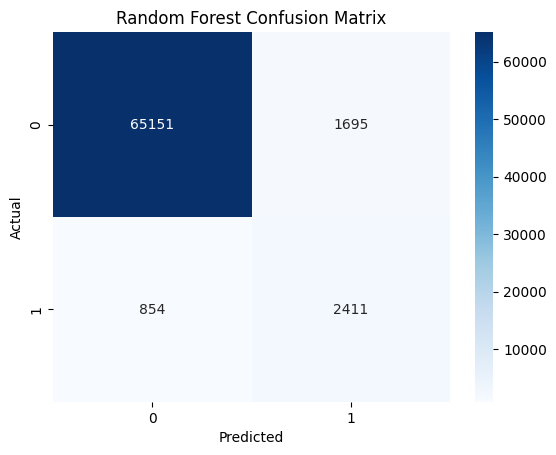

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [231]:
y_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred_80 = (y_proba >= 0.70).astype(int)


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     66846
           1       0.76      0.57      0.65      3265

    accuracy                           0.97     70111
   macro avg       0.87      0.78      0.82     70111
weighted avg       0.97      0.97      0.97     70111



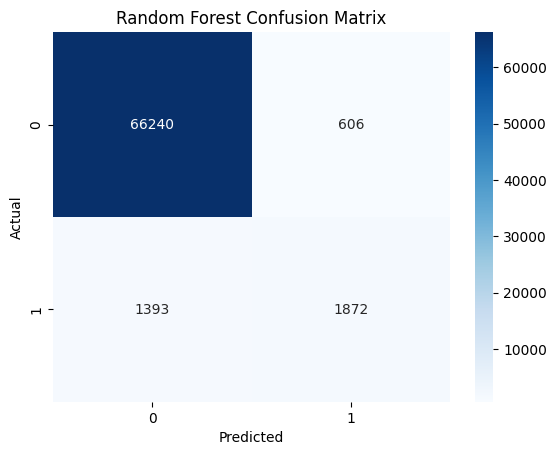

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_80)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()